In [1]:
from __future__ import annotations

import matplotlib.pyplot as plt
from qadence.draw import display

from smoqubo.generator import RandomQUBO
from smoqubo.solver import BaseQAOA

INFO  2024-08-20 16:38:11 - pyqtorch: PyQTorch logger successfully setup with log level 20


Solve the elementary QUBO problem in the documentation:

\begin{equation*}
M = 
\begin{pmatrix}
-5 & -2 \\
-2 & 6
\end{pmatrix}
\end{equation*}

In [2]:
# Define a qubo object: seed=0 sets M as qubo matrix
qubo = RandomQUBO(0)
print(f"QUBO matrix\n{qubo.matrix}\n")

# Obtain the solution with a brute force solver
print(f"Brute force solution, degeneracy {len(qubo.degenerate_solution_bitstrings)}")
print(f"Solution bitstring: {qubo.solution_bitstring}")
print(f"Solution cost: {qubo.solution_cost}")

QUBO matrix
[[-5 -2]
 [-2  6]]

Brute force solution, degeneracy 1
Solution bitstring: [1 0]
Solution cost: -5


In [3]:
# Define a qaoa object
n_layers = 2
qaoa = BaseQAOA(qubo.matrix, n_layers)

INFO  2024-08-20 16:38:12 - qadence.operations.ham_evo: Quantum simulation of the time-independent Schrödinger equation.
INFO  2024-08-20 16:38:12 - qadence.operations.ham_evo: Quantum simulation of the time-independent Schrödinger equation.


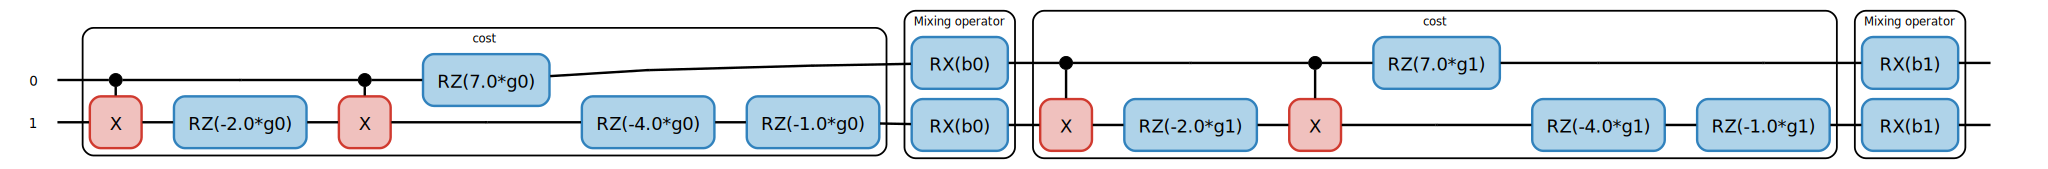

In [4]:
# Display an illustration of the qaoa circuit
display(qaoa.circuit)

In [5]:
# Train the circuit
n_epochs = 100
n_logs_loss_history = min(n_epochs, 50)
lr = 0.1
qaoa.train(n_epochs, n_logs_loss_history, lr)

Initial loss: tensor([0.0068], grad_fn=<SelectBackward0>)

Cost at iteration 10: -0.362450621824605
Cost at iteration 20: -1.9310863161546363
Cost at iteration 30: -2.6580350223684532
Cost at iteration 40: -2.892722752672236
Cost at iteration 50: -2.969715495538647
Cost at iteration 60: -2.9902906831978617
Cost at iteration 70: -2.9965448686818723
Cost at iteration 80: -2.9984867042694576
Cost at iteration 90: -2.999330359394231
Cost at iteration 100: -2.9997446551581737


(tensor([-2.9997], grad_fn=<SelectBackward0>),
 [0.000657707409024958,
  -0.04186274002179965,
  -0.14123861776978103,
  -0.2711514015112405,
  -0.362450621824605,
  -0.42505522897448306,
  -0.4663568820899677,
  -0.627854979657749,
  -1.1311833818748562,
  -1.9310863161546363,
  -2.24977784788958,
  -2.807372725483847,
  -2.8856130739301347,
  -2.551318262992197,
  -2.6580350223684532,
  -2.7757937085734605,
  -2.862850534590796,
  -2.9603428930950884,
  -2.954222278970623,
  -2.892722752672236,
  -2.883438433681977,
  -2.9344241893950365,
  -2.9877647601104975,
  -2.9951545640491166,
  -2.969715495538647,
  -2.9574078843604155,
  -2.9733271233819494,
  -2.994722613582302,
  -2.9991823602467758,
  -2.9902906831978617,
  -2.9849980019797906,
  -2.9899644742464164,
  -2.9977078708343483,
  -2.9996696344414873,
  -2.9965448686818723,
  -2.994680805253087,
  -2.9966482944148694,
  -2.9993369988524976,
  -2.9996770421100813,
  -2.9984867042694576,
  -2.9981457771445434,
  -2.99905474832034

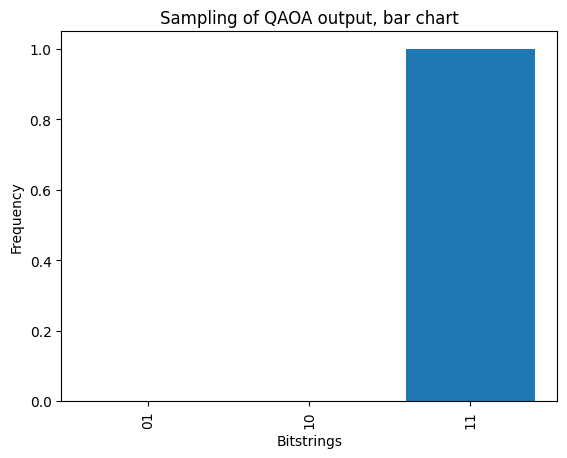

In [6]:
# After training, test the qaoa.model
n_variables = 2
n_qubits = n_variables
n_shots = 1_000_000
wf = qaoa.model.run()
xs = qaoa.model.sample(n_shots=n_shots)[0]
ex = qaoa.model.expectation()
samples = qaoa.model.sample(n_shots=n_shots)[0]
most_frequent = max(samples, key=samples.get)

# Extract keys and values
labels = list(samples.keys())
values = [_/n_shots for _ in list(samples.values())]

# Plotting the bar chart
plt.bar(labels, values)
# Adding labels and title
plt.xlabel("Bitstrings")
plt.ylabel("Frequency")
plt.title("Sampling of QAOA output, bar chart")
plt.xticks(rotation="vertical")

# Display the plot
plt.show()